# Import

In [1]:
# import data processing libraries
import numpy as np
import pandas as pd

# import data visuaization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
sns.set(font_scale=1.05)

In [2]:
# data
df = pd.read_csv("googleplaystore.csv")

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# missing values count
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### App column

In [5]:
df['App'].nunique()

9660

In [6]:
# top 10 apps
df['App'].value_counts()[:10]

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
8 Ball Pool                                           7
slither.io                                            6
Bubble Shooter                                        6
Zombie Catchers                                       6
Bleacher Report: sports news, scores, & highlights    6
Name: App, dtype: int64

- number of unique app's present in data : **9660** out of 10841 data enteries
- *Nothing much to gain from **App's name***

### Category column

In [7]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
df['Category'].nunique()

34

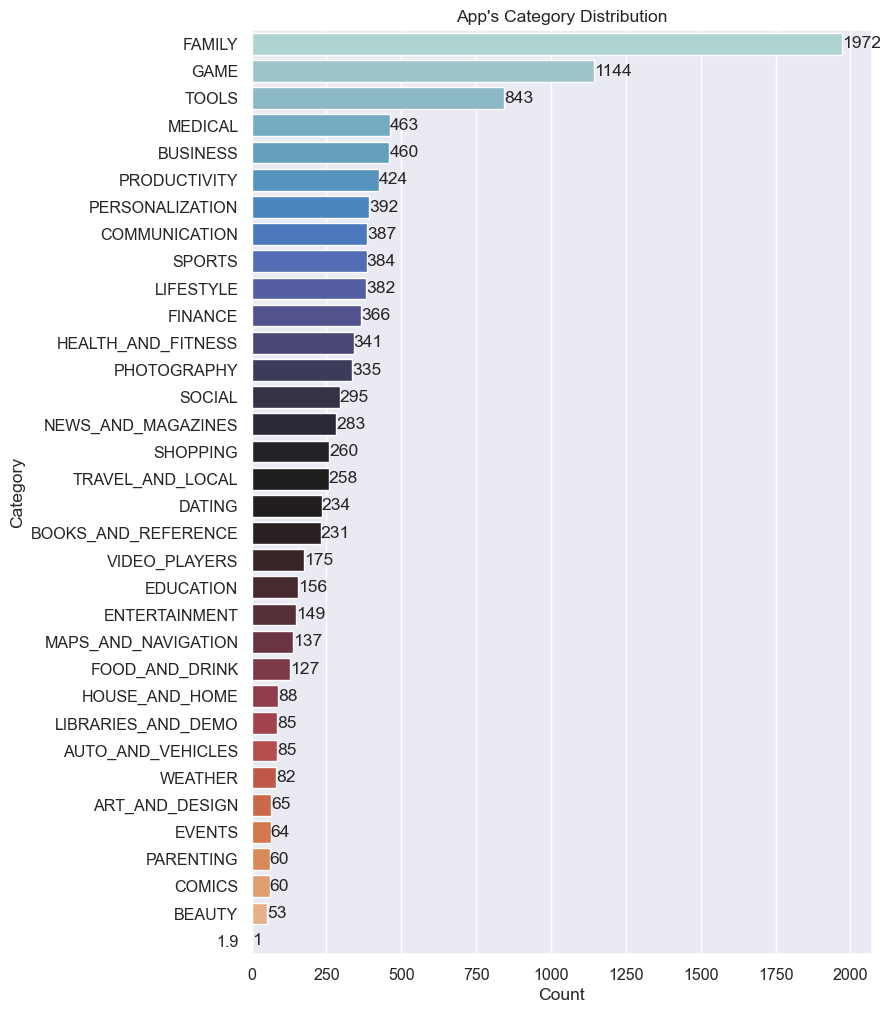

In [9]:
# Categories distibution
plt.figure(figsize=(8, 12))

cat = pd.DataFrame(df['Category'].value_counts()[:]).reset_index()
cat.columns = ['Category', 'Count']

ax = sns.barplot(data=cat, y='Category', x='Count', palette='icefire')#
ax.set_title("App's Category Distribution")

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

### Rating column

In [10]:
# average rating of categories
df.groupby(by='Category')['Rating'].mean()

Category
1.9                    19.000000
ART_AND_DESIGN          4.358065
AUTO_AND_VEHICLES       4.190411
BEAUTY                  4.278571
BOOKS_AND_REFERENCE     4.346067
BUSINESS                4.121452
COMICS                  4.155172
COMMUNICATION           4.158537
DATING                  3.970769
EDUCATION               4.389032
ENTERTAINMENT           4.126174
EVENTS                  4.435556
FAMILY                  4.192272
FINANCE                 4.131889
FOOD_AND_DRINK          4.166972
GAME                    4.286326
HEALTH_AND_FITNESS      4.277104
HOUSE_AND_HOME          4.197368
LIBRARIES_AND_DEMO      4.178462
LIFESTYLE               4.094904
MAPS_AND_NAVIGATION     4.051613
MEDICAL                 4.189143
NEWS_AND_MAGAZINES      4.132189
PARENTING               4.300000
PERSONALIZATION         4.335987
PHOTOGRAPHY             4.192114
PRODUCTIVITY            4.211396
SHOPPING                4.259664
SOCIAL                  4.255598
SPORTS                  4.223511
T

In [11]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- *There is a mis-print (is what I believe) in **1.9 Category** Rating column*
- *As 1.9 category is a category with **value count ==1** I'm deleting this row* 

In [12]:
# droping Category 1.9
df.drop(labels=10472, inplace=True)

# confirming
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
# filling missing values in rating column by considering mean for every category 
df['Rating'] = df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'))

# checking
df['Rating'].isna().sum()

0

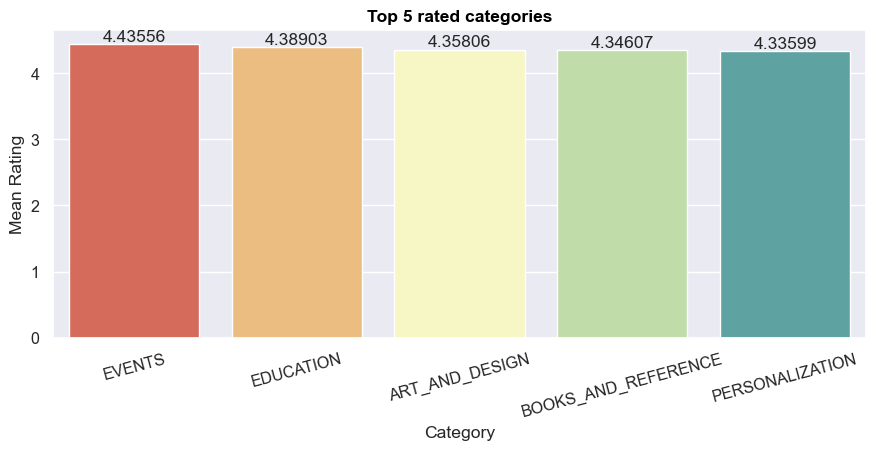

In [14]:
# Categories with highest average rating (top 5)
rating = pd.DataFrame(df.groupby('Category')['Rating'].mean().sort_values(ascending=False)[:5]).reset_index()
rating.columns = ['Category', 'Mean Rating']

plt.figure(figsize=(10.5, 4))
ax = sns.barplot(data=rating, x='Category', y='Mean Rating', palette='Spectral')

ax.set_title('Top 5 rated categories', fontdict={'weight': 'bold', 'color': 'black'})
plt.xticks(rotation=15)

for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

### Reviews

In [15]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [16]:
# checking type of review column
type(df['Reviews'].iloc[0])

str

In [17]:
# convert string to an integer
df['Reviews'] = df['Reviews'].astype(int)

# confirming
type(df['Reviews'].iloc[0])

numpy.int32

In [18]:
# top 10 most reviewed apps
rev_app = pd.DataFrame(df.groupby('App')['Reviews'].max().sort_values(ascending=False)[:10]).reset_index()
rev_app

,App,Reviews
0,Facebook,78158306
1,WhatsApp Messenger,69119316
2,Instagram,66577446
3,Messenger – Text and Video Chat for Free,56646578
4,Clash of Clans,44893888
5,Clean Master- Space Cleaner & Antivirus,42916526
6,Subway Surfers,27725352
7,YouTube,25655305
8,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
9,Clash Royale,23136735


In [19]:
# top 10 most reviewed categories
rev_cat = pd.DataFrame(df.groupby('Category')['Reviews'].max().sort_values(ascending=False)[:10]).reset_index()
rev_cat

,Category,Reviews
0,SOCIAL,78158306
1,COMMUNICATION,69119316
2,GAME,44893888
3,FAMILY,44881447
4,TOOLS,42916526
5,VIDEO_PLAYERS,25655305
6,SPORTS,14184910
7,NEWS_AND_MAGAZINES,11667403
8,PHOTOGRAPHY,10859051
9,TRAVEL_AND_LOCAL,9235373


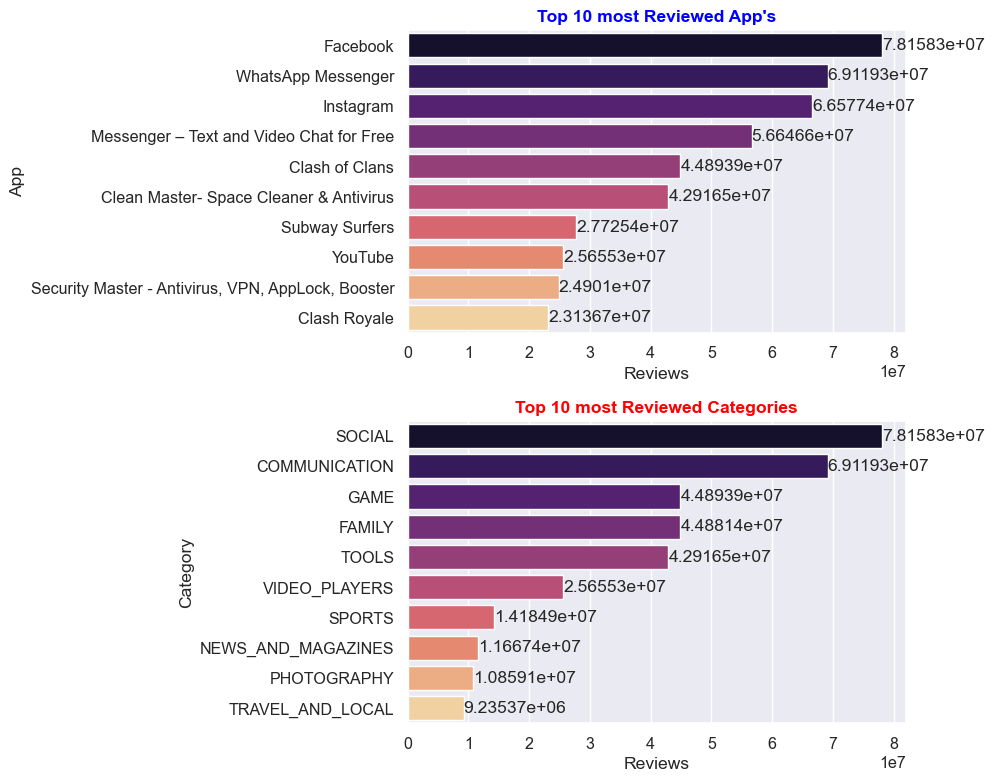

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# app review
ax0 = sns.barplot(data=rev_app, x='Reviews', y='App', ax=ax[0], palette='magma')
ax0.set_title("Top 10 most Reviewed App's", fontdict={'weight': 'bold', 'color': 'blue'})
for i in ax0.containers:
    ax0.bar_label(i,)
    
# category review
ax1 = sns.barplot(data=rev_cat, x='Reviews', y='Category', ax=ax[1], palette='magma')
ax1.set_title("Top 10 most Reviewed Categories", fontdict={'weight': 'bold', 'color': 'red'})
for i in ax1.containers:
    ax1.bar_label(i,)

plt.tight_layout()
plt.show()

### Size

In [21]:
# Renaming Size column to Size(MB)
df.rename(columns = {"Size": "Size(MB)"}, 
          inplace = True)
df.head(2)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [22]:
# converting kb to mb
def kb_to_mb(x):
    if 'Varies with device' in x :
        return 'Varies with device'
    elif 'M' in x :
        return round(float(x.split('M')[0]), 4)
    elif 'k' in x :
        return round((float(x.split('k')[0]))*.001, 4)

# applying func to DataFrame
df['Size(MB)'] = df['Size(MB)'].apply(kb_to_mb)

df.head(3)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [23]:
# category with 100mb size (total=16 entries)
df[df['Size(MB)'] != 'Varies with device'].sort_values(by='Size(MB)', ascending=False)[['App','Category', 'Size(MB)']][:16].groupby(by=['Category', 'App']).max()

Size(MB)
Category           App                                                       
FAMILY             Gangster Town: Vice District                         100.0
                   SimCity BuildIt                                      100.0
FINANCE            Post Bank                                            100.0
GAME               Car Crash III Beam DH Real Damage Simulator 2018     100.0
                   Hungry Shark Evolution                               100.0
                   Miami crime simulator                                100.0
                   Mini Golf King - Multiplayer Game                    100.0
                   Stickman Legends: Shadow Wars                        100.0
                   The Walking Dead: Our World                          100.0
HEALTH_AND_FITNESS Vi Trainer                                           100.0
LIFESTYLE          Talking Babsy Baby: Baby Games                       100.0
MEDICAL            Navi Radiography Pro                                 100.0
SPORTS             Draft Simulator for FUT 18                           100.0
                   Ultimate Tennis                                      100.0

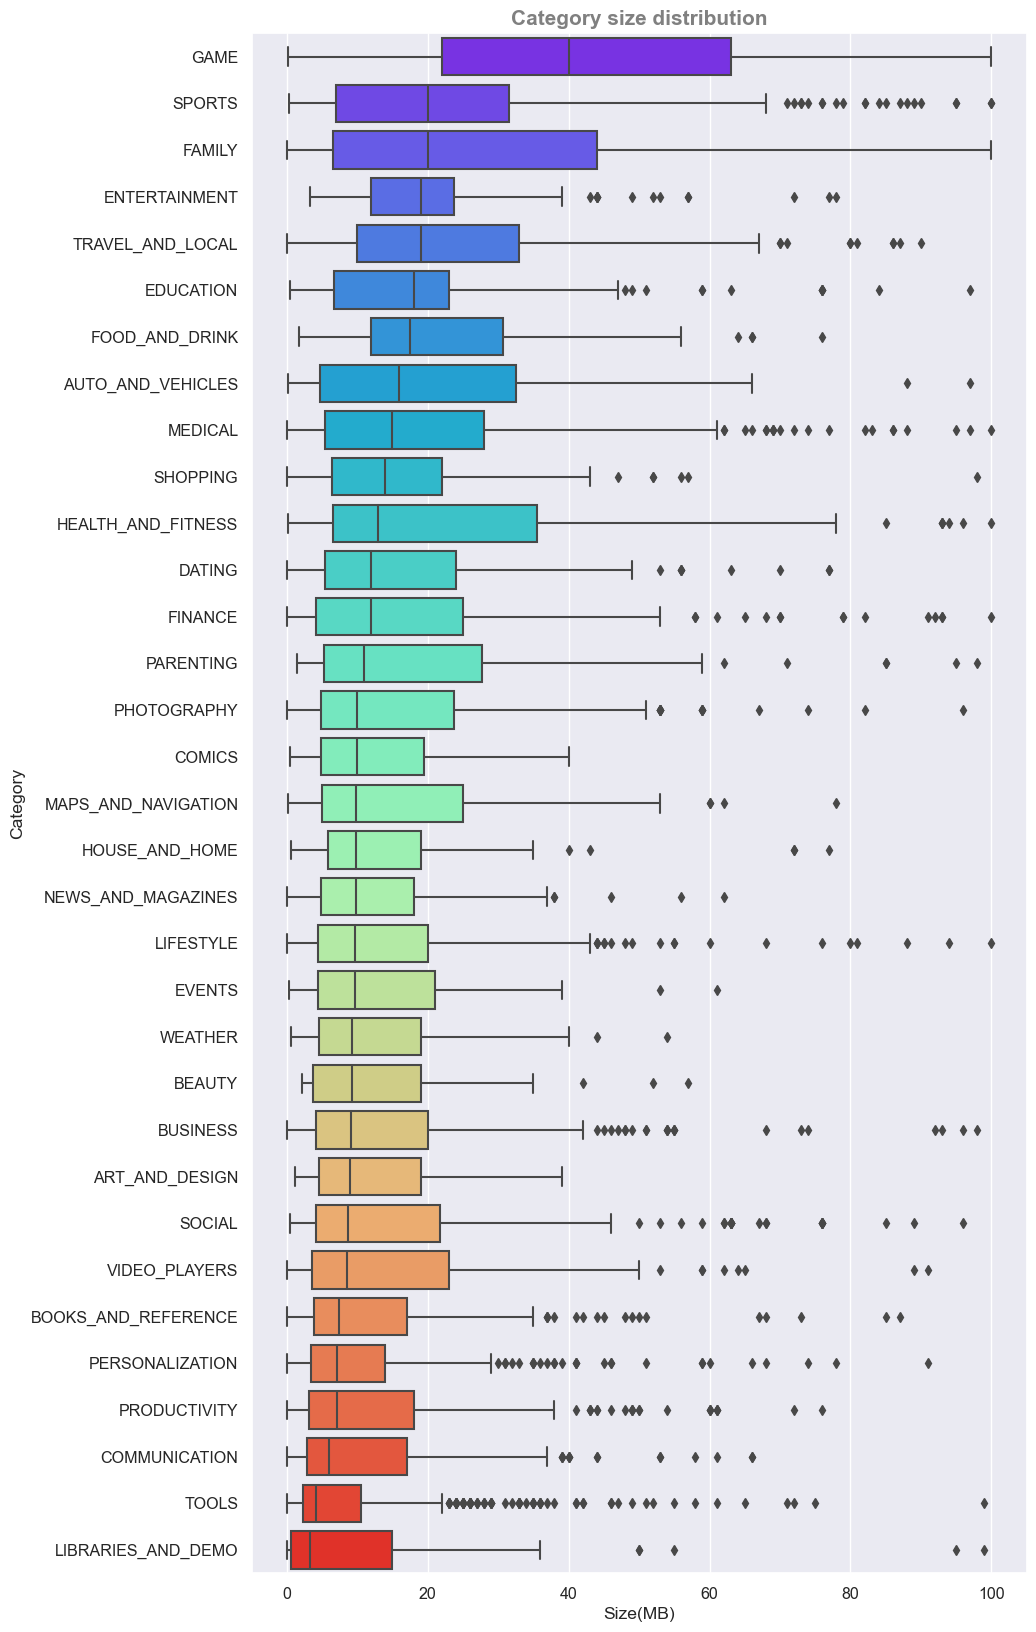

In [24]:
# Category wise size distribution of app's

plt.figure(figsize=(10, 20))

dist_df = df[df['Size(MB)']!='Varies with device'][['Category', 'Size(MB)']]
cat_order = dist_df.groupby(by='Category')['Size(MB)'].median().sort_values(ascending=False).index

ax0 = sns.boxplot(data=dist_df, x='Size(MB)', y='Category', order=cat_order, palette='rainbow')
ax0.set_title('Category size distribution', fontdict={'weight': 'bold', 'color': 'grey', 'fontsize':15})
plt.show()

### Install

In [25]:
# converting str to int 
df['Installs'] = df['Installs'].apply(lambda x : int(x.split('+')[0].replace(',', '')))
df.head(3)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [26]:
# Apps with highest no. of installs (most of them are owned by google)
df.sort_values(by='Installs').groupby(by=['App'])['Installs'].max().sort_values(ascending=False)[:20]

App
Gmail                                       1000000000
Google Street View                          1000000000
Subway Surfers                              1000000000
Facebook                                    1000000000
Skype - free IM & video calls               1000000000
Google                                      1000000000
Google Chrome: Fast & Secure                1000000000
Google Drive                                1000000000
Google News                                 1000000000
Google Play Books                           1000000000
Google Play Games                           1000000000
Google Play Movies & TV                     1000000000
Google Photos                               1000000000
WhatsApp Messenger                          1000000000
Hangouts                                    1000000000
YouTube                                     1000000000
Maps - Navigate & Explore                   1000000000
Messenger – Text and Video Chat for Free    1000000000
Instag

### Type & Price

In [27]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [28]:
# free apps with installs
df[df['Type']=='Free'].groupby(by=['Category','App'])['Installs'].max().sort_values(ascending=False)[:21]

Category             App                                     
TOOLS                Google                                      1000000000
COMMUNICATION        Hangouts                                    1000000000
BOOKS_AND_REFERENCE  Google Play Books                           1000000000
GAME                 Subway Surfers                              1000000000
SOCIAL               Google+                                     1000000000
VIDEO_PLAYERS        Google Play Movies & TV                     1000000000
PRODUCTIVITY         Google Drive                                1000000000
SOCIAL               Instagram                                   1000000000
ENTERTAINMENT        Google Play Games                           1000000000
TRAVEL_AND_LOCAL     Maps - Navigate & Explore                   1000000000
COMMUNICATION        WhatsApp Messenger                          1000000000
TRAVEL_AND_LOCAL     Google Street View                          1000000000
COMMUNICATION        Messe

In [29]:
# renaming 'Price' col with 'Price($)'
df.rename(columns = {"Price": "Price($)"}, 
          inplace = True)

# converting str to float
df['Price($)'] = df['Price($)'].apply(lambda x : float(x.replace('$', '')))


df.head(3)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [30]:
# Adding Col : 'Total Revenue($)' generated by App
df['Total Revenue($)'] = df['Installs'] * df['Price($)']

df.head(3)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total Revenue($)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0


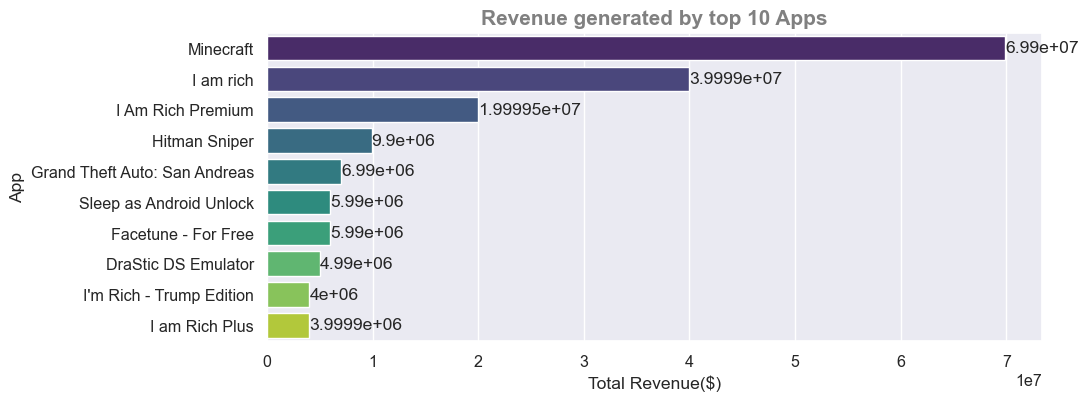

In [31]:
# top 10 apps with highest amount of revenue generated
rev = pd.DataFrame(df.groupby('App')['Total Revenue($)'].max().sort_values(ascending=False)[:10]).reset_index()

fig, ax = plt.subplots(figsize=(10, 4))
ax_0 = sns.barplot(data=rev, x='Total Revenue($)', y='App', ax=ax, palette='viridis')

ax_0.set_title('Revenue generated by top 10 Apps', fontdict={'weight': 'bold', 'color': 'grey', 'fontsize':15})
for i in ax_0.containers:
    ax_0.bar_label(i,)

In [32]:
# names of paid app with zero revenue 
df[(df['Type']=='Paid') & (df['Total Revenue($)']==0.0)]['App']

4465    Popsicle Launcher for Android P 9.0 launcher
5307                         Ak Parti Yardım Toplama
5486                          AP Series Solution Pro
5945                      Ain Arabic Kids Alif Ba ta
6692                                   cronometra-br
9337                        EG | Explore Folegandros
9719                                    EP Cook Book
9905                                     Eu sou Rico
9917                                     Eu Sou Rico
9934               I'm Rich/Eu sou Rico/أنا غني/我很有錢
Name: App, dtype: object

### Content Rating

In [33]:
df.head(2)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total Revenue($)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0


In [34]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

### Genres
- Category is further divided into genres

In [35]:
# Category with multiple genres
for x in range (33) :
    if df.groupby(by=['Category', 'Genres'])['Rating'].count().loc[df['Category'].unique()[x]].count() >1 :
        print(df['Category'].unique()[x])
        print(df.groupby(by=['Category', 'Genres'])['Rating'].count().loc[df['Category'].unique()[x]])
        print('')
        print('')

ART_AND_DESIGN
Genres
Art & Design                       58
Art & Design;Action & Adventure     1
Art & Design;Creativity             5
Art & Design;Pretend Play           1
Name: Rating, dtype: int64


COMICS
Genres
Comics               59
Comics;Creativity     1
Name: Rating, dtype: int64


EDUCATION
Genres
Education                       129
Education;Action & Adventure      1
Education;Brain Games             3
Education;Creativity              3
Education;Education              15
Education;Music & Video           1
Education;Pretend Play            4
Name: Rating, dtype: int64


ENTERTAINMENT
Genres
Entertainment                  136
Entertainment;Brain Games        2
Entertainment;Creativity         1
Entertainment;Music & Video     10
Name: Rating, dtype: int64


LIFESTYLE
Genres
Lifestyle                 381
Lifestyle;Pretend Play      1
Name: Rating, dtype: int64


GAME
Genres
Action                           365
Action;Action & Adventure          3
Adventure                 

In [36]:
# Category with single genre
for x in range (33) :
    if df.groupby(by=['Category', 'Genres'])['Rating'].count().loc[df['Category'].unique()[x]].count() == 1 :
        print(df['Category'].unique()[x])
        print(df.groupby(by=['Category', 'Genres'])['Rating'].count().loc[df['Category'].unique()[x]])
        print('')
        print('')

AUTO_AND_VEHICLES
Genres
Auto & Vehicles    85
Name: Rating, dtype: int64


BEAUTY
Genres
Beauty    53
Name: Rating, dtype: int64


BOOKS_AND_REFERENCE
Genres
Books & Reference    231
Name: Rating, dtype: int64


BUSINESS
Genres
Business    460
Name: Rating, dtype: int64


COMMUNICATION
Genres
Communication    387
Name: Rating, dtype: int64


DATING
Genres
Dating    234
Name: Rating, dtype: int64


EVENTS
Genres
Events    64
Name: Rating, dtype: int64


FINANCE
Genres
Finance    366
Name: Rating, dtype: int64


FOOD_AND_DRINK
Genres
Food & Drink    127
Name: Rating, dtype: int64


HEALTH_AND_FITNESS
Genres
Health & Fitness    341
Name: Rating, dtype: int64


HOUSE_AND_HOME
Genres
House & Home    88
Name: Rating, dtype: int64


LIBRARIES_AND_DEMO
Genres
Libraries & Demo    85
Name: Rating, dtype: int64


MEDICAL
Genres
Medical    463
Name: Rating, dtype: int64


SOCIAL
Genres
Social    295
Name: Rating, dtype: int64


SHOPPING
Genres
Shopping    260
Name: Rating, dtype: int64


PHOTOGRA

### Dates

In [37]:
# Adding 2 new col : 'Year', 'Month'

df['Year'] = df['Last Updated'].apply(lambda x : x.split(', ')[1])
df['Month'] = df['Last Updated'].apply(lambda x : x.split(' ')[0])

df.head(2)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total Revenue($),Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,2018,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,2018,January


In [38]:
# Year of update
df['Year'].value_counts()

# month of update
update_year = pd.DataFrame(df['Year'].value_counts()).reset_index()
update_year.columns = ['Year', 'Updates']
update_year

,Year,Updates
0,2018,7349
1,2017,1867
2,2016,804
3,2015,459
4,2014,209
5,2013,110
6,2012,26
7,2011,15
8,2010,1


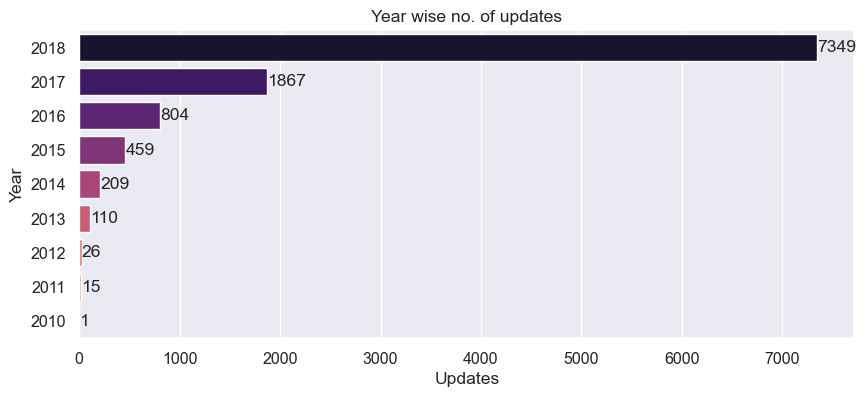

In [39]:
fig, ax = plt.subplots(figsize=(10, 4))

# bar plot
ax0 = sns.barplot(data=update_year, x='Updates', y='Year', ax=ax, palette='magma')
ax0.set_title('Year wise no. of updates')
for i in ax0.containers:
    ax0.bar_label(i,)

In [40]:
# month of update
update_month = pd.DataFrame(df['Month'].value_counts()).reset_index()
update_month.columns = ['Month', 'Updates']
update_month

,Month,Updates
0,July,3163
1,August,1594
2,June,1273
3,May,978
4,March,667
5,April,616
6,February,533
7,January,491
8,December,426
9,October,398


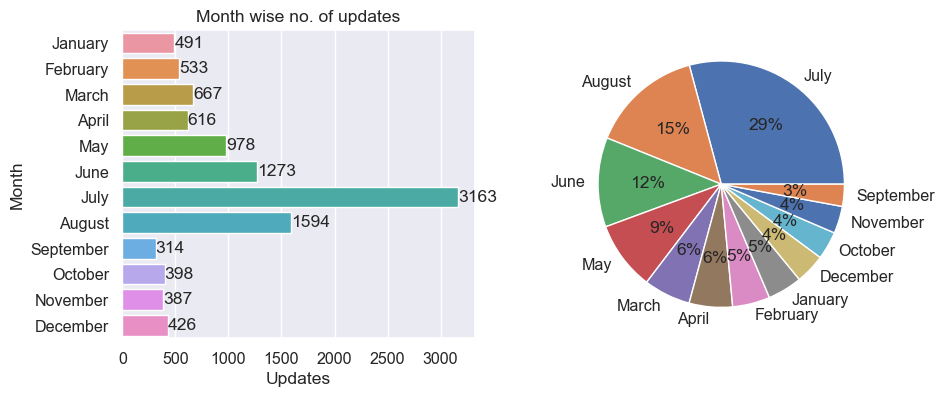

In [41]:
# order for chart
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# bar plot
ax0 = sns.barplot(data=update_month, x='Updates', y='Month', ax=ax[0], order=months)
ax0.set_title('Month wise no. of updates')
for i in ax0.containers:
    ax0.bar_label(i,)


# pie chart
plt.get_cmap('copper')
ax1 = plt.pie(x=update_month['Updates'],
        labels=update_month['Month'],
        autopct='%.0f%%')

plt.show()

### Android version

In [42]:
# missing values
df[df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total Revenue($),Year,Month
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11.0,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,1490.0,2018,July
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1,10000,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN,0.0,2018,March


In [43]:
# filling missing value
df['Android Ver'].fillna(df.groupby(by='Category')['Android Ver'].value_counts().loc['PERSONALIZATION'].idxmax(), inplace=True)

In [44]:
# Android version 
def android_ver(x):
    if x == 'Varies with device':
        return 'Varies with device'
    else :
        return str(x).split('.')[0] + '+'
    
df['Android Ver'] = df['Android Ver'].apply(android_ver)
df.head(3)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Total Revenue($),Year,Month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4+,0.0,2018,January
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4+,0.0,2018,January
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4+,0.0,2018,August


In [45]:
android_ver = pd.DataFrame(df['Android Ver'].value_counts()).reset_index()
android_ver.columns = ['Android Ver', 'Count']
android_ver

,Android Ver,Count
0,4+,6961
1,Varies with device,1362
2,2+,1351
3,5+,629
4,3+,287
5,1+,138
6,6+,60
7,7+,46
8,8+,6


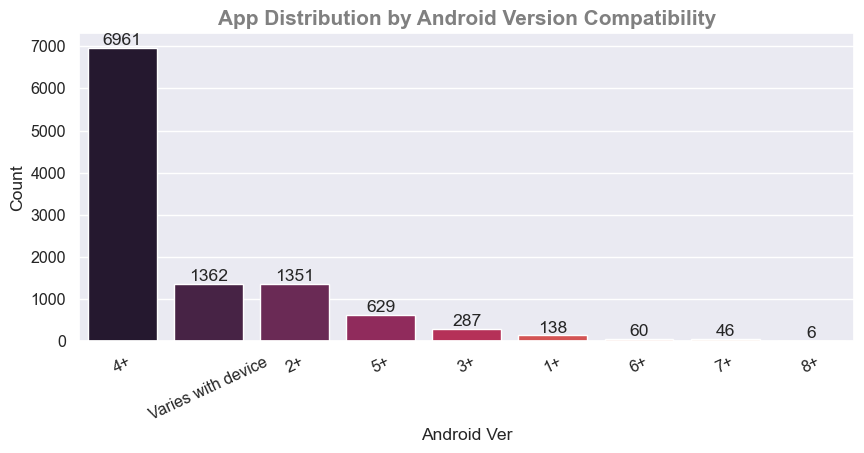

In [46]:
fig, ax = plt.subplots(figsize=(10,4))
ax0 = sns.barplot(data=android_ver, x='Android Ver', y='Count', palette='rocket')

ax0.set_title('App Distribution by Android Version Compatibility', fontdict={'weight': 'bold', 'color': 'grey', 'fontsize':15})
plt.xticks(rotation=25)

for i in ax0.containers:
    ax0.bar_label(i,)
    
plt.show()

## Thank U